In [1]:
from vespa import *


/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [3]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import logging
rootLogger = logging.getLogger()
rootLogger.setLevel(logging.INFO)
np.seterr(divide = 'ignore', invalid='ignore')
import warnings
warnings.simplefilter("error")
warnings.simplefilter("ignore", DeprecationWarning)

In [52]:
pl_sample = pd.read_csv('/Users/neptune/Documents/Thesis/pipeline/data_4_28/Kepler20/plpop_sample.csv')
beb_sample = pd.read_csv('/Users/neptune/Documents/Thesis/pipeline/data_beb_1/K06088.01/sample.csv')

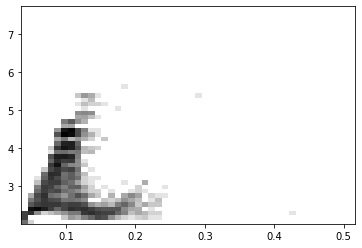

In [27]:
from vespa.plotutils import plot2dhist
plot2dhist(xdata=pl_sample.duration,ydata=pl_sample.slope)

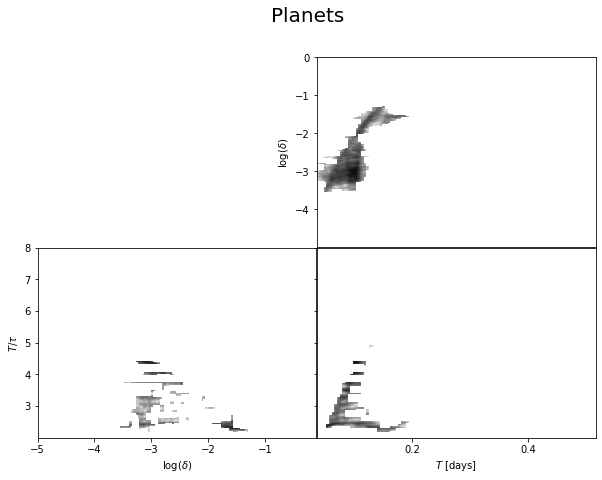

In [51]:
plpop = PlanetPopulation()
plpop.stars= pl_sample
plpop.lhoodplot(piechart=False,nbins=100,figsize=(10,7))

In [55]:
MAfn = MAInterpolationFunction(pmin=0.007, pmax=2.5, nzs=400, nps=400)

In [57]:
bebpop = BEBPopulation().load_hdf('/Users/neptune/Documents/Thesis/pipeline/data_beb_1/K06088.01/beb_K06088.01.h5')

In [66]:
plot2dhist?

In [87]:
plpop.stars

,level_0,Kepler_mag_tot,P,ecc,inc,w,dpri,dsec,T14_pri,T23_pri,...,tru_planet_radius,g_depth,r_depth,i_depth,z_depth,J_depth,K_depth,H_depth,Kepler_depth,obs_planet_radius
0,0,15.479815,6.098556,0.248959,88.572917,340.467125,0.172549,0.000000,0.116269,0.013090,...,22.672557,0.004594,0.009108,0.012814,0.016196,0.021226,0.029760,0.027504,0.009739,5.517047
1,3,15.526047,6.098556,0.000000,89.329677,245.658951,0.708231,0.000000,0.156946,0.000000,...,47.383575,0.018469,0.036511,0.051165,0.064380,0.083986,0.116718,0.107704,0.039006,11.058195
2,5,15.323040,6.098556,0.098805,88.255743,255.839002,0.030407,0.000000,0.088453,0.036630,...,9.924149,0.000975,0.001890,0.002575,0.003183,0.004095,0.005644,0.005239,0.001994,2.565848
3,6,15.498927,6.098556,0.000000,88.705991,178.166532,0.033422,0.000000,0.090206,0.055233,...,9.659884,0.000882,0.001754,0.002477,0.003134,0.004100,0.005710,0.005264,0.001882,2.405341
4,7,15.472943,6.098556,0.114690,88.921468,25.826433,0.065552,0.000000,0.095648,0.052313,...,13.419989,0.001786,0.003580,0.004954,0.006181,0.008005,0.011080,0.010188,0.003785,3.406654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15858,10845,14.478545,6.098556,0.087775,89.424856,22.386149,0.500000,0.242345,0.223021,0.040399,...,87.631371,0.018856,0.035740,0.047913,0.058615,0.074936,0.102646,0.095842,0.037464,11.239289
15859,10847,15.621484,6.098556,0.214814,88.650941,289.878773,0.020994,0.000000,0.096812,0.058253,...,7.600928,0.000481,0.000974,0.001406,0.001805,0.002384,0.003345,0.003068,0.001054,1.758682
15860,10848,14.890722,6.098556,0.000000,88.173492,116.673215,0.374845,0.239005,0.175157,0.000000,...,66.867796,0.009429,0.019404,0.028092,0.036135,0.047938,0.067677,0.061911,0.021006,7.765485
15861,10850,15.512656,6.098556,0.000000,87.632491,215.623052,0.407992,0.000000,0.147214,0.000000,...,53.809957,0.010748,0.021116,0.029949,0.037971,0.049464,0.068364,0.063031,0.022786,8.367661


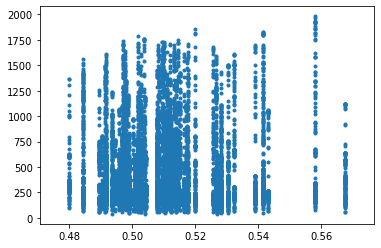

In [96]:
plt.scatter(plpop.stars.radius_1,((plpop.stars.H_depth-plpop.stars.Kepler_depth)/plpop.stars.tru_planet_radius*1e6),marker='.')

In [95]:
plpop.stars.radius_1

0        0.512520
1        0.513319
2        0.526825
3        0.508351
4        0.507636
           ...   
15858    0.532355
15859    0.496546
15860    0.491208
15861    0.508209
15862    0.512311
Name: radius_1, Length: 15863, dtype: float64

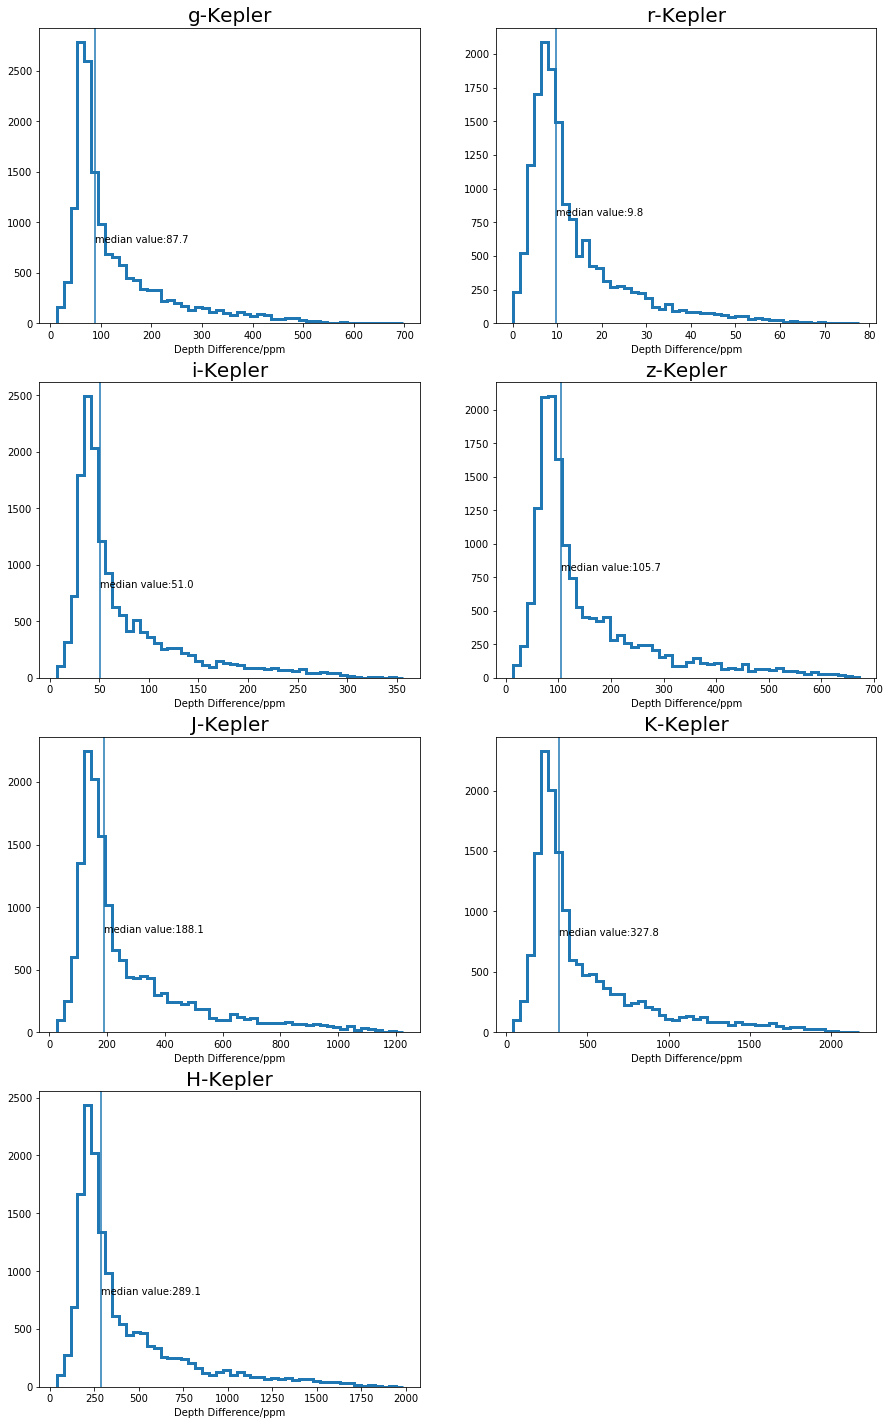

In [91]:
plt.figure(figsize=[15,25])
multi_depth = plpop.stars
for inx, band in enumerate(['g','r','i','z','J','K','H']):

    df = abs(multi_depth[band+'_depth']-multi_depth.Kepler_depth)*1e6/multi_depth.tru_planet_radius
    df.dropna(inplace=True)
    plt.subplot(4,2,inx+1)
    plt.hist(df,histtype='step',lw=3,bins=50)
    plt.title(band+'-Kepler',size =20 )
    plt.xlabel('Depth Difference/ppm')
    plt.annotate('median value:'+str(round(np.median(df),1)),xy=(np.median(df),800))
    plt.axvline(np.median(df))

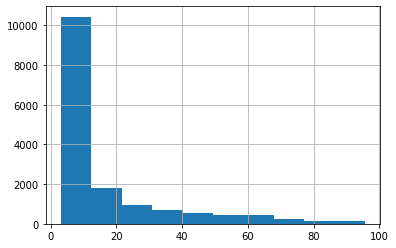

In [88]:
plpop.stars.tru_planet_radius.hist()

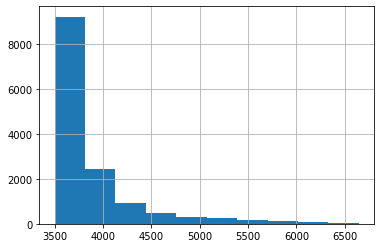

In [72]:
bebpop.stars.Teff_A.hist()

In [74]:
sample1 = pd.read_csv('beb_sample.csv')
sample2 = pd.read_csv('beb_sample_1.csv')

sample = sample1.append(sample2,ignore_index=True)

sample

,host_name,koi,RA,DEC,Teff,Teff_err,g_mag,r_mag,i_mag,z_mag,J_mag,H_mag,K_mag,Kepler_mag,period,transit_depth,l,b
0,NaN,K00178.01,292.03149,49.388618,6495.0,146.0,13.748,13.396,13.322,13.317,12.495,12.237,12.250,13.450,6.142815,122.0,81.298818,14.703331
1,NaN,K00549.01,289.79907,38.555061,5671.0,76.0,15.103,14.507,14.334,14.276,13.336,13.012,12.947,14.565,10.297677,655.5,70.530376,11.543347
2,NaN,K00549.02,289.79907,38.555061,5671.0,76.0,15.103,14.507,14.334,14.276,13.336,13.012,12.947,14.565,0.635587,147.7,70.530376,11.543347
3,NaN,K00495.01,289.31018,39.132221,5470.0,162.0,15.483,14.847,14.612,14.548,13.552,13.107,13.055,14.873,4.804469,744.4,70.895920,12.135044
4,NaN,K01025.01,291.10846,37.857792,3687.0,65.0,17.020,15.621,14.850,14.453,13.206,12.535,12.366,15.501,37.478349,1467.9,70.352351,10.312812
5,NaN,K01459.01,287.14313,46.508060,3752.0,74.0,16.982,15.717,15.139,14.792,13.574,12.926,12.782,15.692,0.692015,4518.1,77.203727,16.561849
6,NaN,K01461.01,287.80457,46.238930,4859.0,146.0,16.635,15.740,15.429,15.291,14.212,13.704,13.536,15.791,7.946710,6084.4,77.126091,16.037308
7,NaN,K00985.01,298.44775,47.264999,5346.0,159.0,15.259,14.550,14.326,14.211,13.203,12.731,12.737,14.606,2.002780,260.5,81.356156,9.940431
8,NaN,K01006.01,299.65094,40.973282,3900.0,105.0,17.361,15.985,15.373,14.993,13.762,13.110,12.922,15.970,30.611393,3472.0,76.310513,6.019756
9,NaN,K01855.01,299.62198,41.212509,4338.0,118.0,15.886,14.741,14.308,14.057,12.967,12.320,12.187,14.782,58.430265,1849.5,76.505368,6.161759


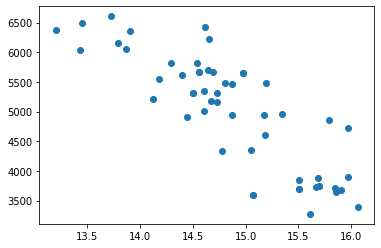

In [76]:
sample = sample[sample.Teff<7000]
plt.scatter(sample.Kepler_mag,sample.Teff)

In [110]:
bebpop.stars.Kepler_mag

0        20.547962
1        20.739170
2        23.142953
3        22.543308
4        23.681878
           ...    
14038    21.419580
14039    22.550300
14040    24.627448
14041    22.897834
14042    24.333385
Name: Kepler_mag, Length: 14043, dtype: float64

In [109]:
bebpop.stars['Kepler_dmag'] = bebpop.mags['Kepler'] - bebpop.stars.Kepler_mag_tot
bebpop.stars['K_dmag'] = bebpop.mags['K'] - bebpop.stars.K_mag

In [108]:
plt.scatter(bebpop.stars.Kepler_dmag-bebpop.stars.K_dmag,bebpop.stars.K_)

0        17.528436
1        18.374492
2        19.913699
3        18.982276
4        20.791918
           ...    
14038    18.646534
14039    18.892706
14040    22.202192
14041    19.489623
14042    21.399736
Name: K_mag, Length: 14043, dtype: float64